# Notebook for plotting twist defect data

This script was used to generate data in Nodelman et al., 2025 NSMB. It reads in a single csv file and plots data in a bar graph.

The expected format of the csv file is one construct per row, with the construct name first, followed by values from different replicates. Data can be separated by multiple commas, which allows experiments to be organized by the days they were carried out (OK to have empty cells/multiple commas without data between every one). Note that the first line is ignored (used for naming experimental datasets. Example data (used for paper) is Nodelman2025NSMB-TwistDefectEntry-Rand2-2024Aug12a.csv

To run this on your computer, you must give the correct paths/directories for the data and output. These are labeled ###Edit this ### in the block 'Edit this block - define data filename and directories' 

This script was made to run with python 3.8.8 (conda install) and jupyter with the following module versions:

jupyter core     : 4.7.1

jupyter-notebook : 6.3.0

qtconsole        : 5.0.3

ipython          : 7.22.0

ipykernel        : 5.3.4

jupyter client   : 6.1.12

jupyter lab      : 3.0.14

nbconvert        : 6.0.7

ipywidgets       : 7.6.3

nbformat         : 5.1.3

traitlets        : 5.0.5

## preamble

In [1]:
%matplotlib inline
from __future__ import division
import matplotlib
#import matplotlib as mpl

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import sys
import time
import statistics
from pylab import *
import re
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import scipy.optimize as opt
from scipy.optimize import curve_fit

matplotlib.rcParams['font.sans-serif']='Arial'
matplotlib.rcParams.update({'font.size': 24, "axes.formatter.limits": (-4,4)})
plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}


colorlist=["red","orange","green","dodgerblue","darkviolet","gray","brown","orange","chocolate","blue",
          "pink","navajowhite","lightgray","cyan","lightskyblue","mediumpurple","red","olive","brown","green",
           "dodgerblue","darkviolet","red","orange","green","yellowgreen","darkviolet","gray","brown","orange","chocolate","blue",
          "pink","navajowhite","lightgray","cyan","lightskyblue","mediumpurple","red","olive","brown","green",
           "dodgerblue","darkviolet","red","orange","green","dodgerblue","darkviolet","gray","brown","orange","chocolate","blue",
          "pink","navajowhite","lightgray","cyan","lightskyblue","mediumpurple","red","olive","brown","green",
           "dodgerblue","darkviolet","red","orange","green","dodgerblue","darkviolet","gray","brown","orange","chocolate","blue",
          "pink","navajowhite","lightgray","cyan","lightskyblue","mediumpurple","red","olive","brown","green",
           "dodgerblue","darkviolet"
          ]

## defs

In [2]:
def gettimestamp():
    '''
    returns a string of the current day-hour-min
    be sure to import time in preamble
    '''
    if time.localtime().tm_min < 10:
        currenttimestamp=str(time.localtime().tm_year)+"_"+str(time.localtime().tm_mon)+"_"+str(time.localtime().tm_mday)+"-"+str(time.localtime().tm_hour)+"0"+str(time.localtime().tm_min)
    else:
        currenttimestamp=str(time.localtime().tm_year)+"_"+str(time.localtime().tm_mon)+"_"+str(time.localtime().tm_mday)+"-"+str(time.localtime().tm_hour)+str(time.localtime().tm_min)
    return(currenttimestamp)
    
def convertcsvtodict(tempfilename,existingdict):
    '''
    this function takes a filename, assuming it to be a csv file, and dumps data into existing dictionary
    note that first line of csv file is skipped.
    data format is for first item of each line to be construct name, followed by data.
    some data may be blank
    '''
    tempfile=open(tempfilename,"r")
    datalist=[]
    tempfilelist=tempfile.readlines()
    tempfile.close()
    existingdict["constructlist-all"]=[]
    for i in range(1,len(tempfilelist)): ### skips first line
        linelisttemp=tempfilelist[i].split(",")
        #print(linelisttemp)
        #print("constructname = ",linelisttemp[0])
        ### make new dictionary entry based on this line of data; first item is key==construct name
        existingdict[linelisttemp[0]]={}
        existingdict[linelisttemp[0]]["constructname"]=linelisttemp[0]
        #existingdict[linelisttemp[0]]["colordefault"]=colorlist[i]
        existingdict[linelisttemp[0]]["color"]="purple"
        existingdict[linelisttemp[0]]["position"]=i
        existingdict[linelisttemp[0]]["origdata"]=[]
        existingdict["constructlist-all"].append(linelisttemp[0])
        for j in range(1,len(linelisttemp)):
            if linelisttemp[j]=="" or linelisttemp[j]=="\n":
                continue
                #print("EMPTY")
            else:
                existingdict[linelisttemp[0]]["origdata"].append(float(linelisttemp[j]))
                #print(linelisttemp[j])    
    return(existingdict)


## Edit this block - define data filename and directories

In [9]:
### Edit this ###
csvdirectory="/Users/gbowman3/tempdata/"
inputdatafile = csvdirectory+"Nodelman2025NSMB-TwistDefectEntry-Rand2-2024Aug12a.csv"

### Edit this ###
outputdirectory="/Users/gbowman3/temp/"

### create output directory if it doesn't already exist
try:
    os.listdir(outputdirectory)
except FileNotFoundError:
    os.mkdir(outputdirectory)
    print("created new directory for output files:\n{}\n\n".format(outputdirectory))
print(outputdirectory)


/Users/gbowman3/temp/


In [10]:
twistdefectrand2dict ={}

### read data from file
twistdefectrand2dict=convertcsvtodict(inputdatafile,twistdefectrand2dict)

### calculate avg and stdev, given the raw data just input
for construct in twistdefectrand2dict["constructlist-all"]:
    twistdefectrand2dict[construct]["AVG"]=np.mean(twistdefectrand2dict[construct]["origdata"])
    twistdefectrand2dict[construct]["STD"]=np.std(twistdefectrand2dict[construct]["origdata"])



for item in twistdefectrand2dict["constructlist-all"]:
    print(item)
    print("{} {} {:5.2f}+/-{:5.2f}".format(item, twistdefectrand2dict[item]["color"],twistdefectrand2dict[item]["AVG"],twistdefectrand2dict[item]["STD"]))


NCP-apo
NCP-apo purple  0.16+/- 0.05
NCP-ADP
NCP-ADP purple  0.16+/- 0.02
120Bwt-apo
120Bwt-apo purple  0.59+/- 0.03
120Bwt-ADP
120Bwt-ADP purple  0.54+/- 0.02
SAIL-apo
SAIL-apo purple  0.23+/- 0.02
SAIL-ADP
SAIL-ADP purple  0.25+/- 0.02
L865N/L869N-apo
L865N/L869N-apo purple  0.24+/- 0.01
L865N/L869N-ADP
L865N/L869N-ADP purple  0.26+/- 0.01
876881-apo
876881-apo purple  0.34+/- 0.01
876881-ADP
876881-ADP purple  0.33+/- 0.01
F877N-apo
F877N-apo purple  0.31+/- 0.01
F877N-ADP
F877N-ADP purple  0.26+/- 0.01
M876N-apo
M876N-apo purple  0.37+/- 0.01
M876N-ADP
M876N-ADP purple  0.32+/- 0.01
SAIL-Lobe2-apo
SAIL-Lobe2-apo purple  0.35+/- 0.02
SAIL-Lobe2-ADP
SAIL-Lobe2-ADP purple  0.51+/- 0.01
884-889-apo
884-889-apo purple  0.68+/- 0.04
884-889-ADP
884-889-ADP purple  0.71+/- 0.02
890-895-apo
890-895-apo purple  0.66+/- 0.01
890-895-ADP
890-895-ADP purple  0.72+/- 0.01
L886N/L889N/L891N-apo
L886N/L889N/L891N-apo purple  0.66+/- 0.01
L886N/L889N/L891N-ADP
L886N/L889N/L891N-ADP purple  0.68+/-

In [11]:
### set colors for bar graph

for construct in twistdefectrand2dict["constructlist-all"]:
    twistdefectrand2dict[construct]['linecolor']="black"
    twistdefectrand2dict[construct]["linewidth"]=0
    twistdefectrand2dict[construct]["linestyle"]='solid'

    if 'NCP' in construct:
        twistdefectrand2dict[construct]['color']="white"
        twistdefectrand2dict[construct]['linecolor']="gray"
        twistdefectrand2dict[construct]["linewidth"]=1.5
        
    if '120Bwt' in construct:
        twistdefectrand2dict[construct]['color']="darkslategray"
        twistdefectrand2dict[construct]['linecolor']="white"

    if 'SAIL-apo' in construct:
        twistdefectrand2dict[construct]['color']="lawngreen"
    if 'SAIL-ADP' in construct:
        twistdefectrand2dict[construct]['color']="lawngreen"
            
    if 'SAIL-Lobe2' in construct:
        twistdefectrand2dict[construct]['color']="red"
        twistdefectrand2dict[construct]['linecolor']="lawngreen"
        twistdefectrand2dict[construct]["linewidth"]=5

        
    if 'L865N/L869N' in construct:
        twistdefectrand2dict[construct]['color']="lawngreen"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2
        
    if '876881' in construct:
        twistdefectrand2dict[construct]['color']="forestgreen"

    if 'M876N' in construct:
        twistdefectrand2dict[construct]['color']="forestgreen"        
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2

    if 'F877N' in construct:
        twistdefectrand2dict[construct]['color']="forestgreen"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2
        
    if '884-889' in construct:
        twistdefectrand2dict[construct]['color']="red"

    if '890-895' in construct:
        twistdefectrand2dict[construct]['color']="darkorange"

    if 'L886N/L889N/L891N' in construct:
        twistdefectrand2dict[construct]['color']="red"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2
        
    if '896-901' in construct:
        twistdefectrand2dict[construct]['color']="gold" #"lightskyblue"

    if '902-907' in construct:
        twistdefectrand2dict[construct]['color']="khaki"

    if 'F917N/L918N/F921N' in construct:
        twistdefectrand2dict[construct]['color']="dodgerblue"

    if '884-889-Y926N' in construct:
        twistdefectrand2dict[construct]['color']="red"
        twistdefectrand2dict[construct]['linecolor']="dodgerblue"
        twistdefectrand2dict[construct]["linewidth"]=5
    elif 'Y926N' in construct:
        twistdefectrand2dict[construct]['color']="dodgerblue"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2

    if '884-889-W932A' in construct:
        twistdefectrand2dict[construct]['color']="red"
        twistdefectrand2dict[construct]['linecolor']="dodgerblue"
        twistdefectrand2dict[construct]["linewidth"]=5    
    elif 'W932A' in construct:
        twistdefectrand2dict[construct]['color']="dodgerblue"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2

    if 'Y841A' in construct:
        twistdefectrand2dict[construct]['color']="white"#"sienna"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2

    if 'A842N' in construct:
        twistdefectrand2dict[construct]['color']="white"#"sienna"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2

    if '884-889-I843N' in construct:
        twistdefectrand2dict[construct]['color']="red"
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]["linewidth"]=2
    elif 'I843N' in construct:
        twistdefectrand2dict[construct]['color']="white"#"sienna"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2

    if 'I583N' in construct:
        twistdefectrand2dict[construct]['color']="gray"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2

    if 'I838N' in construct:
        twistdefectrand2dict[construct]['color']="white"
        twistdefectrand2dict[construct]["linestyle"]='dashed'
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]["linewidth"]=2
        
    if 'M652Q' in construct:
        twistdefectrand2dict[construct]['color']="white"
        twistdefectrand2dict[construct]['linecolor']="black"
        twistdefectrand2dict[construct]['linestyle']='dashed'
        twistdefectrand2dict[construct]["linewidth"]=2
        

In [13]:
for construct in twistdefectrand2dict["constructlist-all"]:
    print(construct)
    if "ADP" in construct:
        print()

NCP-apo
NCP-ADP

120Bwt-apo
120Bwt-ADP

SAIL-apo
SAIL-ADP

L865N/L869N-apo
L865N/L869N-ADP

876881-apo
876881-ADP

F877N-apo
F877N-ADP

M876N-apo
M876N-ADP

SAIL-Lobe2-apo
SAIL-Lobe2-ADP

884-889-apo
884-889-ADP

890-895-apo
890-895-ADP

L886N/L889N/L891N-apo
L886N/L889N/L891N-ADP

896-901-apo
896-901-ADP

902-907-apo
902-907-ADP

F917N/L918N/F921N-apo
F917N/L918N/F921N-ADP

W932A-apo
W932A-ADP

M652Q-apo
M652Q-ADP

I843N-apo
I843N-ADP

I843N-High-apo
I843N-High-ADP

I583N-apo
I583N-ADP

I838N-apo
I838N-ADP

Y841A-apo
Y841A-ADP

A842N-apo
A842N-ADP

Y926N-apo
Y926N-ADP

884-889-SAIL-apo
884-889-SAIL-ADP

884-889-I843N-apo
884-889-I843N-ADP

884-889-Y926N-apo
884-889-Y926N-ADP

884-889-W932A-apo
884-889-W932A-ADP

884-889-W932A-apo
884-889-W932A-ADP



In [20]:

### set order:
twistdefectrand2dict["constructlist"]=['NCP-apo', 
                                       'NCP-ADP', 
                                       '120Bwt-apo', 
                                       '120Bwt-ADP', 
                                       'SAIL-apo', 
                                       'SAIL-ADP',
                                       #'L865N/L869N-apo', 
                                       #'L865N/L869N-ADP',
                                       #'SAIL-Lobe2-apo', 
                                       #'SAIL-Lobe2-ADP',
                                       '876881-apo', 
                                       '876881-ADP', 
                                       #'M876N-apo', 'M876N-ADP',
                                       #'F877N-apo', 'F877N-ADP',  
                                       '884-889-apo', 
                                       '884-889-ADP', 
                                       #'L886N/L889N/L891N-apo', 
                                       #'L886N/L889N/L891N-ADP', 
                                       '890-895-apo', 
                                       '890-895-ADP', 
                                      
                                       '896-901-apo', 
                                       '896-901-ADP', 
                                       '902-907-apo', 
                                       '902-907-ADP', 
                                       'F917N/L918N/F921N-apo', 
                                       'F917N/L918N/F921N-ADP'
                                       #'W932A-apo', #'W932A-ADP', 
                                       #'M652Q-apo', #'M652Q-ADP', 
                                       #'I843N-apo', #'I843N-ADP'
                                      ]
### change position:
### here set position automatically from the list
for i in range(len(twistdefectrand2dict["constructlist"])):
    twistdefectrand2dict[twistdefectrand2dict["constructlist"][i]]['position']=i

for item in twistdefectrand2dict["constructlist"]:
    print("*{}*".format(item))
print(twistdefectrand2dict["constructlist"])


*NCP-apo*
*NCP-ADP*
*120Bwt-apo*
*120Bwt-ADP*
*SAIL-apo*
*SAIL-ADP*
*876881-apo*
*876881-ADP*
*884-889-apo*
*884-889-ADP*
*890-895-apo*
*890-895-ADP*
*896-901-apo*
*896-901-ADP*
*902-907-apo*
*902-907-ADP*
*F917N/L918N/F921N-apo*
*F917N/L918N/F921N-ADP*
['NCP-apo', 'NCP-ADP', '120Bwt-apo', '120Bwt-ADP', 'SAIL-apo', 'SAIL-ADP', '876881-apo', '876881-ADP', '884-889-apo', '884-889-ADP', '890-895-apo', '890-895-ADP', '896-901-apo', '896-901-ADP', '902-907-apo', '902-907-ADP', 'F917N/L918N/F921N-apo', 'F917N/L918N/F921N-ADP']


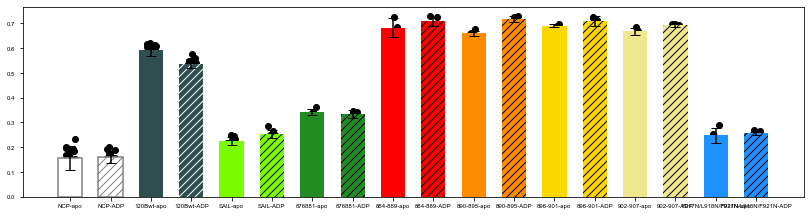

In [21]:
### plot bar graphs, based on construct list in dictionary
plotStyles3={"markersize":9,"markeredgewidth":1.0,"linewidth":3.0}
mpl.rcParams.update({'font.size': 6, "axes.formatter.limits": (-4,4)})
mpl.rcParams.update({"figure.figsize": (14,3.5),'errorbar.capsize': 2})

updatedpositions = []
for construct in twistdefectrand2dict["constructlist"]:
    updatedpositions.append(twistdefectrand2dict[construct]["position"])
    
fig, ax = plt.subplots()
spread=0.4
w = 0.6    # bar width
cap=5
for construct in twistdefectrand2dict["constructlist"]:
    if "ADP" in construct:
        ax.bar(
           twistdefectrand2dict[construct]["position"],
           height = twistdefectrand2dict[construct]["AVG"],
           yerr=twistdefectrand2dict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectrand2dict[construct]["color"],
           linestyle = twistdefectrand2dict[construct]["linestyle"],
           linewidth = twistdefectrand2dict[construct]["linewidth"],
           edgecolor = twistdefectrand2dict[construct]["linecolor"],
           hatch='///'
            #color = (0,0,0,0)#"black"
          )
    else:
        ax.bar(
           twistdefectrand2dict[construct]["position"],
           height = twistdefectrand2dict[construct]["AVG"],
           yerr=twistdefectrand2dict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectrand2dict[construct]["color"],
           linestyle = twistdefectrand2dict[construct]["linestyle"],
           linewidth = twistdefectrand2dict[construct]["linewidth"],
           edgecolor = twistdefectrand2dict[construct]["linecolor"]
            #color = (0,0,0,0)#"black"
           )
for construct in twistdefectrand2dict["constructlist"]:
    for point in twistdefectrand2dict[construct]["origdata"]:
        ax.scatter(
            twistdefectrand2dict[construct]["position"] + np.random.random()*w*spread-w*spread/2,point,color="black")


plt.xticks(updatedpositions,labels=twistdefectrand2dict["constructlist"])
label_size = 14
#add time stamp to filename
workingname=outputdirectory+"TwistDefectPlot-TArichrand2biotinblocked-"+gettimestamp()+".pdf"

#uncomment to save plot as a PDF
savefig(workingname,format='pdf',dpi=300, bbox_inches='tight')
#ax.set_xticks(updatedpositions,twistdefectrand2dict["constructlist"])
plt.show()

In [15]:

### set order:
twistdefectrand2dict["constructlist"]=['NCP-apo', 
                                       'NCP-ADP', 
                                       '120Bwt-apo', 
                                       '120Bwt-ADP', 
                                       #'SAIL-apo', 
                                       #'SAIL-ADP',
                                       'L865N/L869N-apo', 
                                       'L865N/L869N-ADP',
                                       'SAIL-Lobe2-apo', 
                                       'SAIL-Lobe2-ADP',
                                       #'876881-apo', 
                                       #'876881-ADP', 
                                       'M876N-apo', 'M876N-ADP',
                                       'F877N-apo', 'F877N-ADP',  
                                       #'884-889-apo', 
                                       #'884-889-ADP', 
                                       'L886N/L889N/L891N-apo', 
                                       'L886N/L889N/L891N-ADP',
                                       #'890-895-apo', 
                                       #'890-895-ADP', 
                                      
                                       #'896-901-apo', 
                                       #'896-901-ADP', 
                                       #'902-907-apo', 
                                       #'902-907-ADP', 
                                       #'#F917N/L918N/F921N-apo', 
                                       #'#F917N/L918N/F921N-ADP'
                                       #'W932A-apo', #'W932A-ADP', 
                                       'M652Q-apo','M652Q-ADP'
                                       #'I843N-apo', #'I843N-ADP'
                                      ]
### change position:
### here set position automatically from the list
for i in range(len(twistdefectrand2dict["constructlist"])):
    twistdefectrand2dict[twistdefectrand2dict["constructlist"][i]]['position']=i

for item in twistdefectrand2dict["constructlist"]:
    print("*{}*".format(item))
print(twistdefectrand2dict["constructlist"])


*NCP-apo*
*NCP-ADP*
*120Bwt-apo*
*120Bwt-ADP*
*L865N/L869N-apo*
*L865N/L869N-ADP*
*SAIL-Lobe2-apo*
*SAIL-Lobe2-ADP*
*M876N-apo*
*M876N-ADP*
*F877N-apo*
*F877N-ADP*
*L886N/L889N/L891N-apo*
*L886N/L889N/L891N-ADP*
*M652Q-apo*
*M652Q-ADP*
['NCP-apo', 'NCP-ADP', '120Bwt-apo', '120Bwt-ADP', 'L865N/L869N-apo', 'L865N/L869N-ADP', 'SAIL-Lobe2-apo', 'SAIL-Lobe2-ADP', 'M876N-apo', 'M876N-ADP', 'F877N-apo', 'F877N-ADP', 'L886N/L889N/L891N-apo', 'L886N/L889N/L891N-ADP', 'M652Q-apo', 'M652Q-ADP']


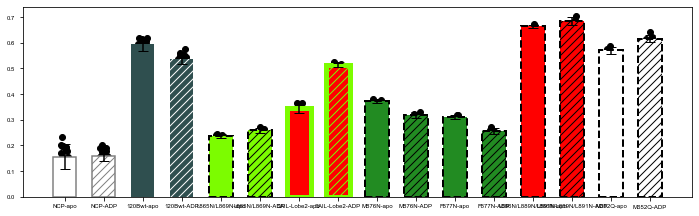

In [16]:
### plot bar graphs, based on construct list in dictionary
plotStyles3={"markersize":9,"markeredgewidth":1.0,"linewidth":3.0}
mpl.rcParams.update({'font.size': 6, "axes.formatter.limits": (-4,4)})
mpl.rcParams.update({"figure.figsize": (12,3.5),'errorbar.capsize': 2})

updatedpositions = []
for construct in twistdefectrand2dict["constructlist"]:
    updatedpositions.append(twistdefectrand2dict[construct]["position"])
    
fig, ax = plt.subplots()
spread=0.4
w = 0.6    # bar width
cap=5
for construct in twistdefectrand2dict["constructlist"]:
    if "ADP" in construct:
        ax.bar(
           twistdefectrand2dict[construct]["position"],
           height = twistdefectrand2dict[construct]["AVG"],
           yerr=twistdefectrand2dict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectrand2dict[construct]["color"],
           linestyle = twistdefectrand2dict[construct]["linestyle"],
           linewidth = twistdefectrand2dict[construct]["linewidth"],
           edgecolor = twistdefectrand2dict[construct]["linecolor"],
           hatch='///'
            #color = (0,0,0,0)#"black"
          )
    else:
        ax.bar(
           twistdefectrand2dict[construct]["position"],
           height = twistdefectrand2dict[construct]["AVG"],
           yerr=twistdefectrand2dict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectrand2dict[construct]["color"],
           linestyle = twistdefectrand2dict[construct]["linestyle"],
           linewidth = twistdefectrand2dict[construct]["linewidth"],
           edgecolor = twistdefectrand2dict[construct]["linecolor"]
            #color = (0,0,0,0)#"black"
           )
for construct in twistdefectrand2dict["constructlist"]:
    for point in twistdefectrand2dict[construct]["origdata"]:
        ax.scatter(
            twistdefectrand2dict[construct]["position"] + np.random.random()*w*spread-w*spread/2,point,color="black")


plt.xticks(updatedpositions,labels=twistdefectrand2dict["constructlist"])
label_size = 14
#add time stamp to filename
workingname=outputdirectory+"TwistDefectPlot-TArichrand2biotinblocked-"+gettimestamp()+".pdf"

#uncomment to save plot as a PDF
savefig(workingname,format='pdf',dpi=300, bbox_inches='tight')
#ax.set_xticks(updatedpositions,twistdefectrand2dict["constructlist"])
plt.show()

In [18]:

### set order:
twistdefectrand2dict["constructlist"]=['NCP-apo', 
                                       'NCP-ADP', 
                                       '120Bwt-apo', 
                                       '120Bwt-ADP', 
                                       'I583N-apo', 'I583N-ADP',
                                       'I838N-apo', 'I838N-ADP',  
                                       'Y841A-apo', 
                                       'Y841A-ADP',
                                       'A842N-apo', 
                                       'A842N-ADP',
                                       'I843N-apo', 
                                       'I843N-ADP',
                                       '884-889-I843N-apo', 
                                       '884-889-I843N-ADP', 
                                       
                                       'Y926N-apo','Y926N-ADP', 
                                       '884-889-Y926N-apo', 
                                       '884-889-Y926N-ADP', 
                                       'W932A-apo','W932A-ADP', 
                                       '884-889-W932A-apo', 
                                       '884-889-W932A-ADP', 
                                       
                                      ]
### change position:
### here set position automatically from the list
for i in range(len(twistdefectrand2dict["constructlist"])):
    twistdefectrand2dict[twistdefectrand2dict["constructlist"][i]]['position']=i

for item in twistdefectrand2dict["constructlist"]:
    print("*{}*".format(item))
print(twistdefectrand2dict["constructlist"])


*NCP-apo*
*NCP-ADP*
*120Bwt-apo*
*120Bwt-ADP*
*I583N-apo*
*I583N-ADP*
*I838N-apo*
*I838N-ADP*
*Y841A-apo*
*Y841A-ADP*
*A842N-apo*
*A842N-ADP*
*I843N-apo*
*I843N-ADP*
*884-889-I843N-apo*
*884-889-I843N-ADP*
*Y926N-apo*
*Y926N-ADP*
*884-889-Y926N-apo*
*884-889-Y926N-ADP*
*W932A-apo*
*W932A-ADP*
*884-889-W932A-apo*
*884-889-W932A-ADP*
['NCP-apo', 'NCP-ADP', '120Bwt-apo', '120Bwt-ADP', 'I583N-apo', 'I583N-ADP', 'I838N-apo', 'I838N-ADP', 'Y841A-apo', 'Y841A-ADP', 'A842N-apo', 'A842N-ADP', 'I843N-apo', 'I843N-ADP', '884-889-I843N-apo', '884-889-I843N-ADP', 'Y926N-apo', 'Y926N-ADP', '884-889-Y926N-apo', '884-889-Y926N-ADP', 'W932A-apo', 'W932A-ADP', '884-889-W932A-apo', '884-889-W932A-ADP']


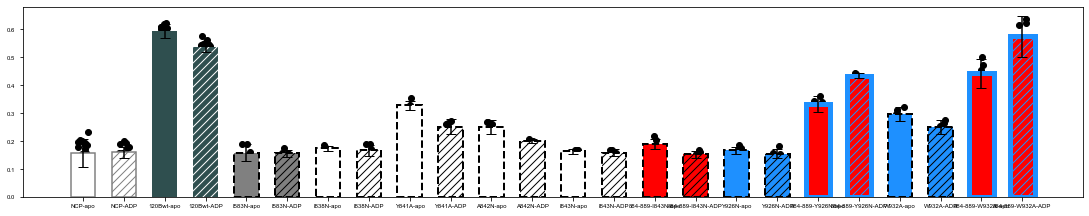

In [19]:
### plot bar graphs, based on construct list in dictionary
plotStyles3={"markersize":9,"markeredgewidth":1.0,"linewidth":3.0}
mpl.rcParams.update({'font.size': 6, "axes.formatter.limits": (-4,4)})
mpl.rcParams.update({"figure.figsize": (19,3.5),'errorbar.capsize': 2})

updatedpositions = []
for construct in twistdefectrand2dict["constructlist"]:
    updatedpositions.append(twistdefectrand2dict[construct]["position"])
    
fig, ax = plt.subplots()
spread=0.4
w = 0.6    # bar width
cap=5
for construct in twistdefectrand2dict["constructlist"]:
    if "ADP" in construct:
        ax.bar(
           twistdefectrand2dict[construct]["position"],
           height = twistdefectrand2dict[construct]["AVG"],
           yerr=twistdefectrand2dict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectrand2dict[construct]["color"],
           linestyle = twistdefectrand2dict[construct]["linestyle"],
           linewidth = twistdefectrand2dict[construct]["linewidth"],
           edgecolor = twistdefectrand2dict[construct]["linecolor"],
           hatch='///'
            #color = (0,0,0,0)#"black"
          )
    else:
        ax.bar(
           twistdefectrand2dict[construct]["position"],
           height = twistdefectrand2dict[construct]["AVG"],
           yerr=twistdefectrand2dict[construct]["STD"],
           capsize=cap,
           width=w,
           color=twistdefectrand2dict[construct]["color"],
           linestyle = twistdefectrand2dict[construct]["linestyle"],
           linewidth = twistdefectrand2dict[construct]["linewidth"],
           edgecolor = twistdefectrand2dict[construct]["linecolor"]
            #color = (0,0,0,0)#"black"
           )
for construct in twistdefectrand2dict["constructlist"]:
    for point in twistdefectrand2dict[construct]["origdata"]:
        ax.scatter(
            twistdefectrand2dict[construct]["position"] + np.random.random()*w*spread-w*spread/2,point,color="black")


plt.xticks(updatedpositions,labels=twistdefectrand2dict["constructlist"])
label_size = 14
#add time stamp to filename
workingname=outputdirectory+"TwistDefectPlot-TArichrand2biotinblocked2-"+gettimestamp()+".pdf"

#uncomment to save plot as a PDF
savefig(workingname,format='pdf',dpi=300, bbox_inches='tight')
#ax.set_xticks(updatedpositions,twistdefectrand2dict["constructlist"])
plt.show()